# Evaluation

In [1]:
def iou(a, b):
    # get area of a
    area_a = (a[2] - a[0]) * (a[3] - a[1])
    # get area of b
    area_b = (b[2] - b[0]) * (b[3] - b[1])
    
    # get left top x of IoU
    iou_x1 = np.maximum(a[0], b[0])
    # get left top y of IoU
    iou_y1 = np.maximum(a[1], b[1])
    # get right bottom of IoU
    iou_x2 = np.minimum(a[2], b[2])
    # get right bottom of IoU
    iou_y2 = np.minimum(a[3], b[3])
    
    # get width of IoU
    iou_w = iou_x2 - iou_x1
    # get height of IoU
    iou_h = iou_y2 - iou_y1

    # no overlap
    if iou_w < 0 or iou_h < 0:
        return 0.0
    
    # get area of IoU
    area_iou = iou_w * iou_h
    # get overlap ratio between IoU and all area
    iou = area_iou / (area_a + area_b - area_iou)
    union = (area_a + area_b - area_iou)

    return iou

In [2]:
def overlap(a, b):
    # get area of a
    area_a = (a[2] - a[0]) * (a[3] - a[1])
    # get area of b
    area_b = (b[2] - b[0]) * (b[3] - b[1])
    
    # get left top x of IoU
    iou_x1 = np.maximum(a[0], b[0])
    # get left top y of IoU
    iou_y1 = np.maximum(a[1], b[1])
    # get right bottom of IoU
    iou_x2 = np.minimum(a[2], b[2])
    # get right bottom of IoU
    iou_y2 = np.minimum(a[3], b[3])

    # get width of IoU
    iou_w = iou_x2 - iou_x1
    # get height of IoU
    iou_h = iou_y2 - iou_y1

    # no overlap
    if iou_w < 0 or iou_h < 0:
        return 0.0
    
    # get area of IoU
    area_iou = iou_w * iou_h
    # get overlap ratio between IoU and all area
#     iou = area_iou / (area_a + area_b - area_iou)
#     union = (area_a + area_b - area_iou)

    return area_iou

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import seaborn as sns
%matplotlib inline

In [5]:
GT = pd.read_csv('./groundtruth.csv',header=None)
# GT = GT[0].str.split('\t', expand = True)
# GT[0] = GT[0].astype(int)
# GT[1] = GT[1].astype(int)
# GT[2] = GT[2].astype(int)
# GT[3] = GT[3].astype(int)
GT.head()

,0,1,2,3
0,269,75,34,64
1,272,75,34,64
2,272,72,34,64
3,272,73,34,64
4,269,74,34,64


In [6]:
gt = pd.DataFrame()
gt['x1'] = GT[0]
gt['y1'] = GT[1]
gt['x2'] = GT[2] + GT[0]
gt['y2'] = GT[3] + GT[1]
gt.head()

,x1,y1,x2,y2
0,269,75,303,139
1,272,75,306,139
2,272,72,306,136
3,272,73,306,137
4,269,74,303,138


In [9]:
csrt = pd.read_csv('./results/csrt.csv')
kcf = pd.read_csv('./results/kcf.csv')
boosting = pd.read_csv('./results/boosting.csv')
mil = pd.read_csv('./results/MIL.csv')
tld = pd.read_csv('./results/TLD.csv')
mf = pd.read_csv('./results/medianflow.csv')

In [14]:
kcf.shape

(293, 4)

In [16]:
def evaluate(tracker):
    IOU = []
    OL=[]
    count = 0
    for i in range(293):
        A = np.array(tracker[i:i+1], dtype=np.float32)
        A = A[0]
        B = np.array(gt[i:i+1], dtype=np.float32)
        B = B[0]
        IoU = iou(A, B)
        ol = overlap(A, B)
        if ol == 0:
            count += 1
        
        IOU.append(IoU)
        OL.append(ol)
    
    return IOU,OL,count

In [17]:
miou = []
Rob = []

In [18]:
precision=[]
recall = []

### KCF Tracker

In [19]:
IoU_kcf = []
ol_kcf = []
count_kcf = 0
IoU_kcf,ol_kcf, count_kcf = evaluate(kcf)
time = [int(v) for v in range(293)]

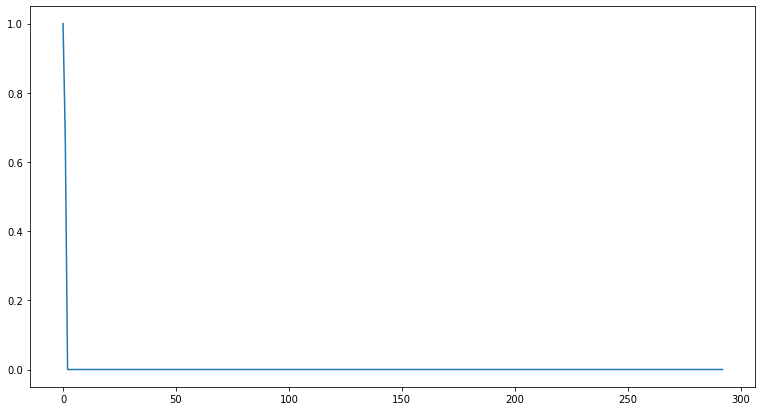

In [20]:
plt.figure(figsize=(13,7))
plt.plot(time, IoU_kcf)
plt.show()

In [21]:
rob = count_kcf / len(gt)
Rob.append(rob)
print('Robustness：',rob)
mIoU = sum(IoU_kcf) / len(gt)
miou.append(mIoU)
print('mIoU:',mIoU)

Robustness： 0.9931740614334471
mIoU: 0.005677844884045702


In [22]:
kcf.shape

(293, 4)

In [23]:
TP = []
FP = []
for i in range(293):
    if IoU_kcf[i] > 0.5:
        TP.append(IoU_kcf[i])
    
    elif IoU_kcf[i] < 0.5:
        FP.append(IoU_kcf[i])     
        
Recall = len(TP) / (293)
print('Recall：',Recall)
Precision = len(TP) / (293-count_kcf)
print('Precision：', Precision)
recall.append(Recall)
precision.append(Precision)

Recall： 0.006825938566552901
Precision： 1.0


In [24]:
pre_kcf = []

In [25]:
th = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for j in th:
    TP = []
    FP = []
    for i in range(293):
        if IoU_kcf[i] > j:
            TP.append(IoU_kcf[i])
        elif IoU_kcf[i] < j:
            FP.append(IoU_kcf[i])     
    Recall = len(TP) / (293)
    print('Recall：',Recall)
    Precision = (len(TP) / (293-count_kcf))*100
    print('Precision：', Precision)
    pre_kcf.append(Precision)

Recall： 0.006825938566552901
Precision： 100.0
Recall： 0.006825938566552901
Precision： 100.0
Recall： 0.006825938566552901
Precision： 100.0
Recall： 0.006825938566552901
Precision： 100.0
Recall： 0.006825938566552901
Precision： 100.0
Recall： 0.006825938566552901
Precision： 100.0
Recall： 0.006825938566552901
Precision： 100.0
Recall： 0.0034129692832764505
Precision： 50.0
Recall： 0.0034129692832764505
Precision： 50.0
Recall： 0.0034129692832764505
Precision： 50.0
Recall： 0.0
Precision： 0.0


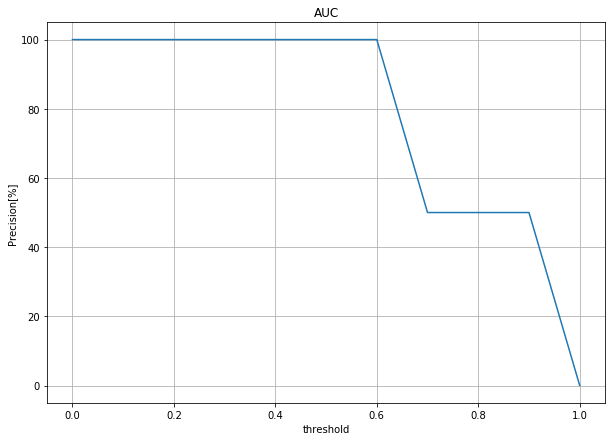

In [26]:
plt.figure(figsize=(10,7))
plt.plot(th, pre_kcf, antialiased=True)
plt.grid()
plt.title('AUC')
plt.xlabel('threshold')
plt.ylabel('Precision[%]')
plt.show()

### CSRT Tracker

In [27]:
IoU_csrt = []
ol_csrt = []
count_csrt = 0
IoU_csrt, ol_csrt, count_csrt = evaluate(csrt)
time = [int(v) for v in range(293)]

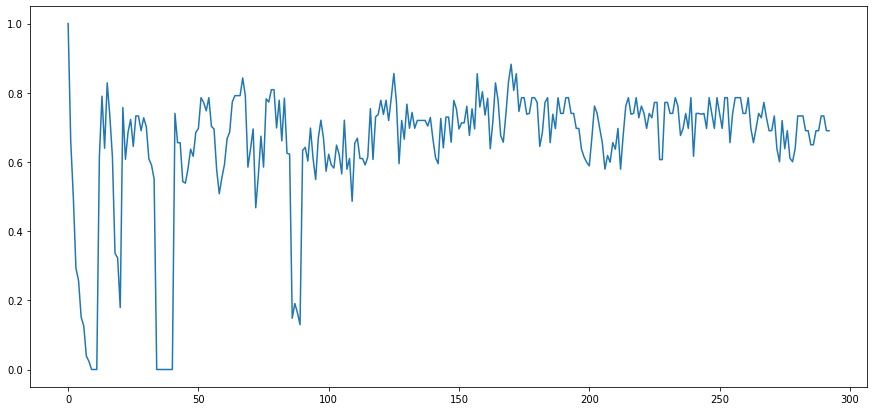

In [28]:
plt.figure(figsize=(15,7))
plt.plot(time, IoU_csrt)
plt.show()

In [29]:
rob = count_csrt / len(gt)
print('Robustness：',rob)
mIoU = sum(IoU_csrt) / len(gt)
print('mIoU:',mIoU)
miou.append(mIoU)
Rob.append(rob)

Robustness： 0.034129692832764506
mIoU: 0.6544090662304146


In [30]:
TP = []
FP = []
for i in range(293):
    if IoU_csrt[i] > 0.5:
        TP.append(IoU_csrt[i])
    
    elif IoU_csrt[i] < 0.5:
        FP.append(IoU_csrt[i])     
        
Recall = len(TP) / (293)
print('Recall：',Recall)
Precision = len(TP) / (293-count_csrt)
print('Precision：', Precision)
recall.append(Recall)
precision.append(Precision)

Recall： 0.9112627986348123
Precision： 0.9434628975265018


In [31]:
pre_csrt = []

In [32]:
th = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for j in th:
    TP = []
    FP = []
    for i in range(293):
        if IoU_csrt[i] > j:
            TP.append(IoU_csrt[i])
        elif IoU_csrt[i] < j:
            FP.append(IoU_csrt[i])     
    Recall = len(TP) / (293)
    print('Recall：',Recall)
    Precision = (len(TP) / (293-count_csrt))*100
    print('Precision：', Precision)
    pre_csrt.append(Precision)

Recall： 0.9658703071672355
Precision： 100.0
Recall： 0.9590443686006825
Precision： 99.29328621908127
Recall： 0.9351535836177475
Precision： 96.81978798586573
Recall： 0.9283276450511946
Precision： 96.113074204947
Recall： 0.9215017064846417
Precision： 95.40636042402826
Recall： 0.9112627986348123
Precision： 94.34628975265018
Recall： 0.8225255972696246
Precision： 85.15901060070671
Recall： 0.47440273037542663
Precision： 49.11660777385159
Recall： 0.04436860068259386
Precision： 4.593639575971731
Recall： 0.0034129692832764505
Precision： 0.35335689045936397
Recall： 0.0
Precision： 0.0


### Boosting Tracker

In [33]:
IoU_b = []
ol_b = []
count_b = 0
IoU_b,ol_b, count_b = evaluate(boosting)

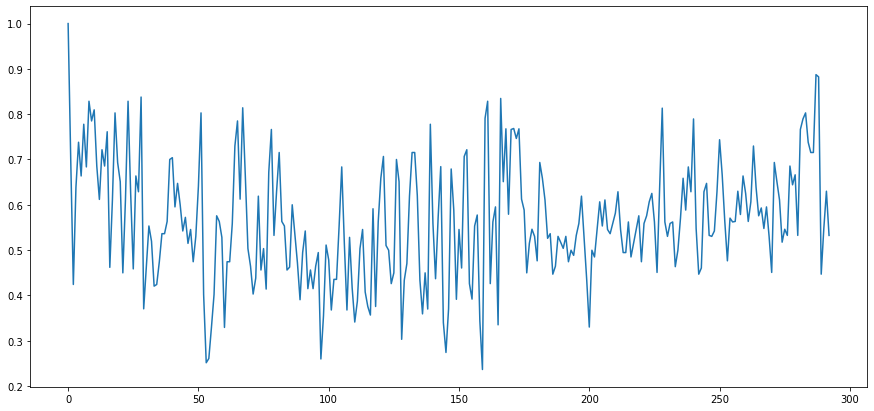

In [34]:
plt.figure(figsize=(15,7))
plt.plot(time, IoU_b)
plt.show()

In [35]:
rob = count_b / len(gt)
print('Robustness：',rob)
mIoU = sum(IoU_b) / len(gt)
print('mIoU:',mIoU)
miou.append(mIoU)
Rob.append(rob)

Robustness： 0.0
mIoU: 0.5637765357417052


In [36]:
TP = []
FP = []
for i in range(293):
    if IoU_b[i] > 0.5:
        TP.append(IoU_b[i])
    
    elif IoU_b[i] < 0.5:
        FP.append(IoU_b[i])     
        
Recall = len(TP) / (293)
print('Recall：',Recall)
Precision = len(TP) / (293-count_b)
print('Precision：', Precision)
recall.append(Recall)
precision.append(Precision)

Recall： 0.6860068259385665
Precision： 0.6860068259385665


In [40]:
pre_b = []

In [41]:
th = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for j in th:
    TP = []
    FP = []
    for i in range(293):
        if IoU_b[i] > j:
            TP.append(IoU_b[i])
        elif IoU_b[i] < j:
            FP.append(IoU_b[i])     
    Recall = len(TP) / (293)
    print('Recall：',Recall)
    Precision = (len(TP) / (293-count_b))*100
    print('Precision：', Precision)
    pre_b.append(Precision)

Recall： 1.0
Precision： 100.0
Recall： 1.0
Precision： 100.0
Recall： 1.0
Precision： 100.0
Recall： 0.9829351535836177
Precision： 98.29351535836177
Recall： 0.9078498293515358
Precision： 90.78498293515358
Recall： 0.6860068259385665
Precision： 68.60068259385666
Recall： 0.3651877133105802
Precision： 36.51877133105802
Recall： 0.15017064846416384
Precision： 15.017064846416384
Recall： 0.04778156996587031
Precision： 4.778156996587031
Recall： 0.0034129692832764505
Precision： 0.3412969283276451
Recall： 0.0
Precision： 0.0


### Median flow Tracker

In [42]:
IoU_mf = []
ol_mf = []
count_mf = 0
IoU_mf,ol_mf, count_mf = evaluate(mf)

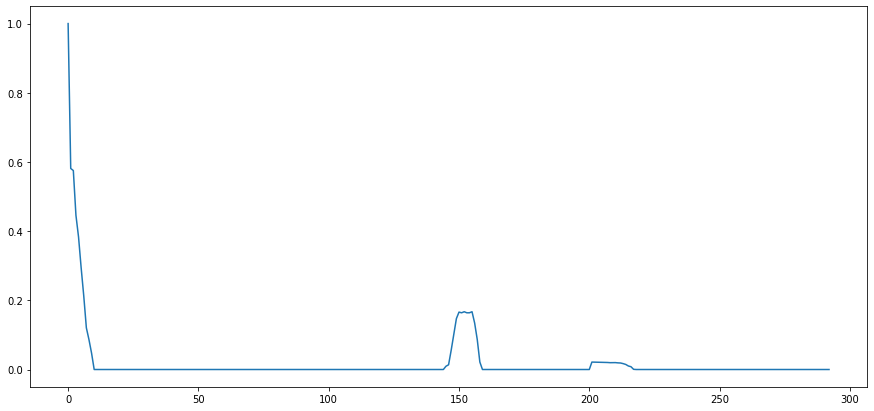

In [43]:
plt.figure(figsize=(15,7))
plt.plot(time, IoU_mf)
plt.show()

In [44]:
rob = count_mf / len(gt)
print('Robustness：',rob)
mIoU = sum(IoU_mf) / len(gt)
print('mIoU:',mIoU)
miou.append(mIoU)
Rob.append(rob)

Robustness： 0.8600682593856656
mIoU: 0.019117299104967622


In [45]:
TP = []
FP = []
for i in range(293):
    if IoU_mf[i] > 0.5:
        TP.append(IoU_mf[i])
    
    elif IoU_mf[i] < 0.5:
        FP.append(IoU_mf[i])     
        
Recall = len(TP) / (293)
print('Recall：',Recall)
Precision = len(TP) / (293-count_mf)
print('Precision：', Precision)
recall.append(Recall)
precision.append(Precision)

Recall： 0.010238907849829351
Precision： 0.07317073170731707


In [46]:
pre_mf = []

In [47]:
th = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for j in th:
    TP = []
    FP = []
    for i in range(293):
        if IoU_mf[i] > j:
            TP.append(IoU_mf[i])
        elif IoU_mf[i] < j:
            FP.append(IoU_mf[i])     
    Recall = len(TP) / (293)
    print('Recall：',Recall)
    Precision = (len(TP) / (293-count_mf))*100
    print('Precision：', Precision)
    pre_mf.append(Precision)

Recall： 0.13993174061433447
Precision： 100.0
Recall： 0.05802047781569966
Precision： 41.46341463414634
Recall： 0.023890784982935155
Precision： 17.073170731707318
Recall： 0.017064846416382253
Precision： 12.195121951219512
Recall： 0.013651877133105802
Precision： 9.75609756097561
Recall： 0.010238907849829351
Precision： 7.317073170731707
Recall： 0.0034129692832764505
Precision： 2.4390243902439024
Recall： 0.0034129692832764505
Precision： 2.4390243902439024
Recall： 0.0034129692832764505
Precision： 2.4390243902439024
Recall： 0.0034129692832764505
Precision： 2.4390243902439024
Recall： 0.0
Precision： 0.0


### MIL Tracker

In [48]:
IoU_mil = []
ol_mil = []
count_mil = 0
IoU_mil,ol_mil, count_mil = evaluate(mil)

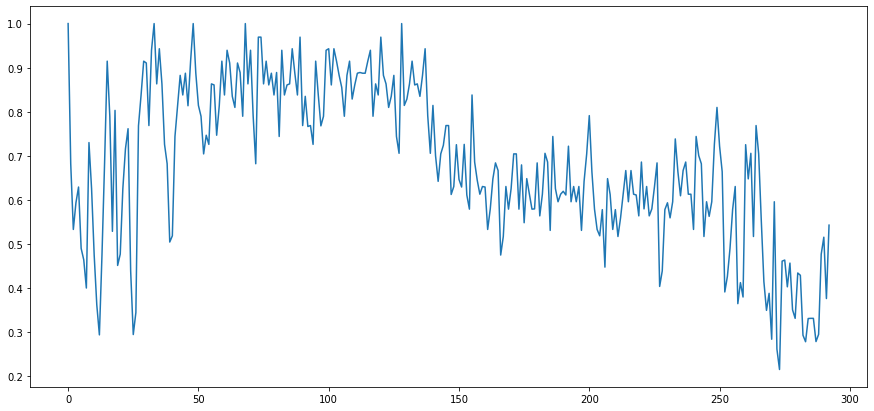

In [49]:
plt.figure(figsize=(15,7))
plt.plot(time, IoU_mil)
plt.show()

In [50]:
rob = count_mil / len(gt)
print('Robustness：',rob)
mIoU = sum(IoU_mil) / len(gt)
print('mIoU:',mIoU)
miou.append(mIoU)
Rob.append(rob)

Robustness： 0.0
mIoU: 0.6825902635428686


In [51]:
TP = []
FP = []
for i in range(293):
    if IoU_mil[i] > 0.5:
        TP.append(IoU_mil[i])
    
    elif IoU_mil[i] < 0.5:
        FP.append(IoU_mil[i])     
        
Recall = len(TP) / (293)
print('Recall：',Recall)
Precision = len(TP) / (293-count_mil)
print('Precision：', Precision)
recall.append(Recall)
precision.append(Precision)

Recall： 0.8464163822525598
Precision： 0.8464163822525598


In [52]:
pre_mil = []

In [53]:
th = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for j in th:
    TP = []
    FP = []
    for i in range(293):
        if IoU_mil[i] > j:
            TP.append(IoU_mil[i])
        elif IoU_mil[i] < j:
            FP.append(IoU_mil[i])     
    Recall = len(TP) / (293)
    print('Recall：',Recall)
    Precision = (len(TP) / (293-count_mil))*100
    print('Precision：', Precision)
    pre_mil.append(Precision)

Recall： 1.0
Precision： 100.0
Recall： 1.0
Precision： 100.0
Recall： 1.0
Precision： 100.0
Recall： 0.9692832764505119
Precision： 96.9283276450512
Recall： 0.9215017064846417
Precision： 92.15017064846417
Recall： 0.8464163822525598
Precision： 84.64163822525597
Recall： 0.6825938566552902
Precision： 68.25938566552901
Recall： 0.4778156996587031
Precision： 47.781569965870304
Recall： 0.310580204778157
Precision： 31.058020477815703
Recall： 0.11262798634812286
Precision： 11.262798634812286
Recall： 0.0
Precision： 0.0


### TLD Tracker 

In [54]:
IoU_tld = []
ol_tld = []
count_tld = 0
IoU_tld,ol_tld, count_tld = evaluate(tld)

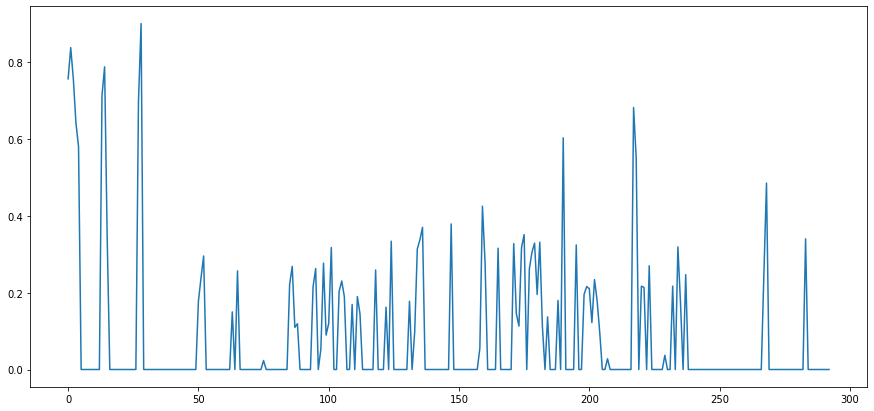

In [55]:
plt.figure(figsize=(15,7))
plt.plot(time, IoU_tld)
plt.show()

In [56]:
rob = count_tld / len(gt)
print('Robustness：',rob)
mIoU = sum(IoU_tld) / len(gt)
print('mIoU:',mIoU)
miou.append(mIoU)
Rob.append(rob)

Robustness： 0.7201365187713311
mIoU: 0.08246344436633912


In [57]:
TP = []
FP = []
for i in range(293):
    if IoU_tld[i] > 0.5:
        TP.append(IoU_tld[i])
    
    elif IoU_tld[i] < 0.5:
        FP.append(IoU_tld[i])     
        
Recall = len(TP) / (293)
print('Recall：',Recall)
Precision = len(TP) / (293-count_tld)
print('Precision：', Precision)
recall.append(Recall)
precision.append(Precision)

Recall： 0.040955631399317405
Precision： 0.14634146341463414


In [58]:
pre_tld = []

In [59]:
th = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for j in th:
    TP = []
    FP = []
    for i in range(293):
        if IoU_tld[i] > j:
            TP.append(IoU_tld[i])
        elif IoU_tld[i] < j:
            FP.append(IoU_tld[i])     
    Recall = len(TP) / (293)
    print('Recall：',Recall)
    Precision = (len(TP) / (293-count_tld))*100
    print('Precision：', Precision)
    pre_tld.append(Precision)

Recall： 0.27986348122866894
Precision： 100.0
Recall： 0.2525597269624573
Precision： 90.2439024390244
Recall： 0.18088737201365188
Precision： 64.63414634146342
Recall： 0.10580204778156997
Precision： 37.80487804878049
Recall： 0.04778156996587031
Precision： 17.073170731707318
Recall： 0.040955631399317405
Precision： 14.634146341463413
Recall： 0.034129692832764506
Precision： 12.195121951219512
Recall： 0.020477815699658702
Precision： 7.317073170731707
Recall： 0.006825938566552901
Precision： 2.4390243902439024
Recall： 0.0034129692832764505
Precision： 1.2195121951219512
Recall： 0.0
Precision： 0.0


## Result

$$
{Precision =  \frac{正しく(IoU > 0.5)で検出できた数}{全てのPredicted BBoxの数}}
$$

$$
{Recall =  \frac{正しく(IoU > 0.5)で検出できた数}{全てのGT BBoxの数}}
$$

$$
{Robustness = \frac{追跡失敗した回数(overlap=0)}{frame数}}
$$

In [60]:
tracker = ['kcf','csrt','boosting','medianflow','mil','tld']
result = pd.DataFrame()
result = result.assign(Tracker=tracker)
result = result.assign(Robustness = Rob)
result = result.assign(mIoU = miou)
result = result.assign(Recall = recall)
result = result.assign(Precision= precision)
result = result[['Tracker','mIoU', 'Robustness','Recall','Precision']]
result

,Tracker,mIoU,Robustness,Recall,Precision
0,kcf,0.005678,0.993174,0.006826,1.000000
1,csrt,0.654409,0.034130,0.911263,0.943463
2,boosting,0.563777,0.000000,0.686007,0.686007
3,medianflow,0.019117,0.860068,0.010239,0.073171
4,mil,0.682590,0.000000,0.846416,0.846416
5,tld,0.082463,0.720137,0.040956,0.146341


### AUC（area under curve）：  
正解とみなす overlap の threshold を変化させてできる precision の変化をプロットした際の曲線の下側の面積（area under curve）。

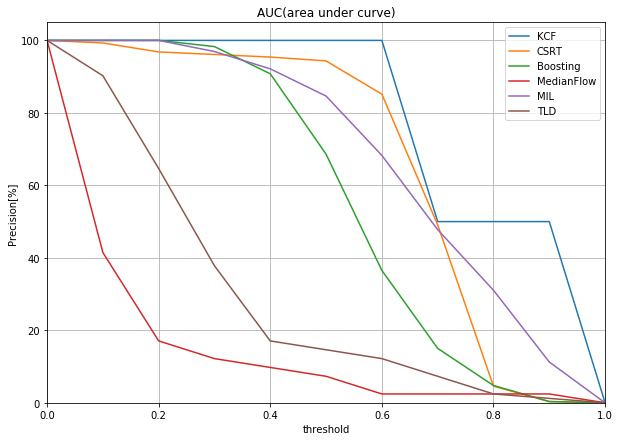

In [63]:
plt.figure(figsize=(10,7))
p1 = plt.plot(th, pre_kcf, antialiased=True)
p2 = plt.plot(th, pre_csrt, antialiased=True)
p3 = plt.plot(th, pre_b, antialiased=True)
p4 = plt.plot(th, pre_mf, antialiased=True)
p5 = plt.plot(th, pre_mil, antialiased=True)
p6 = plt.plot(th, pre_tld, antialiased=True)
plt.legend((p1[0],p2[0],p3[0],p4[0],p5[0],p6[0]), ("KCF","CSRT","Boosting","MedianFlow","MIL","TLD"))
plt.grid()
plt.xlim(0.0, 1.0)
plt.ylim(0, 105)
plt.title('AUC(area under curve)')
plt.xlabel('threshold')
plt.ylabel('Precision[%]')
plt.show()